## Lab 6

Done by Neo Qi Xiang
U1921697H

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


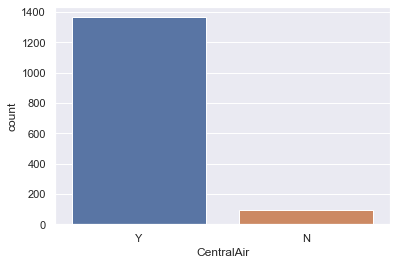

In [4]:
sb.countplot(houseData["CentralAir"])

 ## Do you think this will create any problem in our Classification ?
 
There will be a problem with this unbalance, there will definietly be overlaps in sale price of houses with CentralAir
 and those without
    

Plot houseData['CentralAir'] vs houseData['SalePrice'] using boxplot, and note the strong relationship.
Also check the mutual relationship by plotting the two variables using a swarmplot, and note the difference.


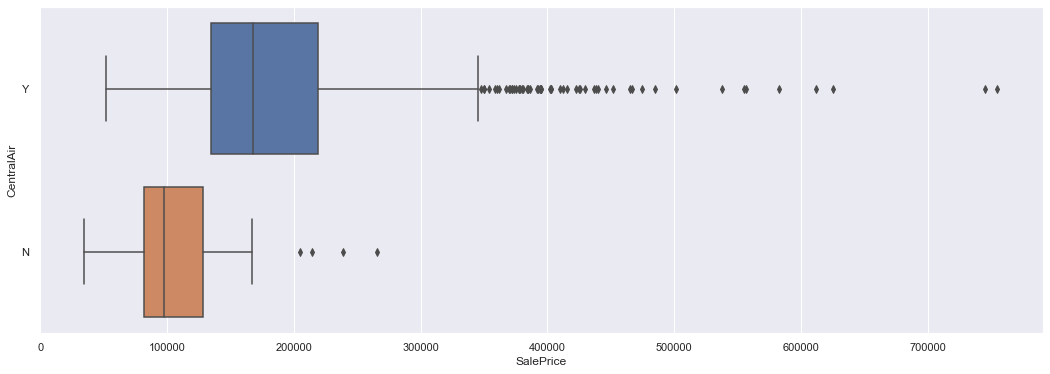

In [5]:
jointDF = pd.concat([houseData['SalePrice'], houseData['CentralAir'].reindex(index=houseData['SalePrice'].index)], sort = False, axis = 1)

f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = jointDF, orient = "h")

In [6]:
from sklearn.tree import DecisionTreeClassifier

Partition the complete dataset houseData into houseData_train (1100 rows) and houseData_test (360 rows)

In [7]:
houseData_train = pd.DataFrame(houseData[:1100])
houseData_test = pd.DataFrame(houseData[:360])
print("Train Set :", houseData_train.shape, "Test Set:", houseData_test.shape)


Train Set : (1100, 81) Test Set: (360, 81)


Training : Fit a Decision Tree model for classification of CentralAir using SalePrice using the following variables.


y_train = pd.DataFrame(houseData_train['CentralAir'])


X_train = pd.DataFrame(houseData_train['SalePrice'])

In [8]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 4)

y_train = pd.DataFrame(houseData_train['CentralAir'])
X_train = pd.DataFrame(houseData_train['SalePrice'])

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

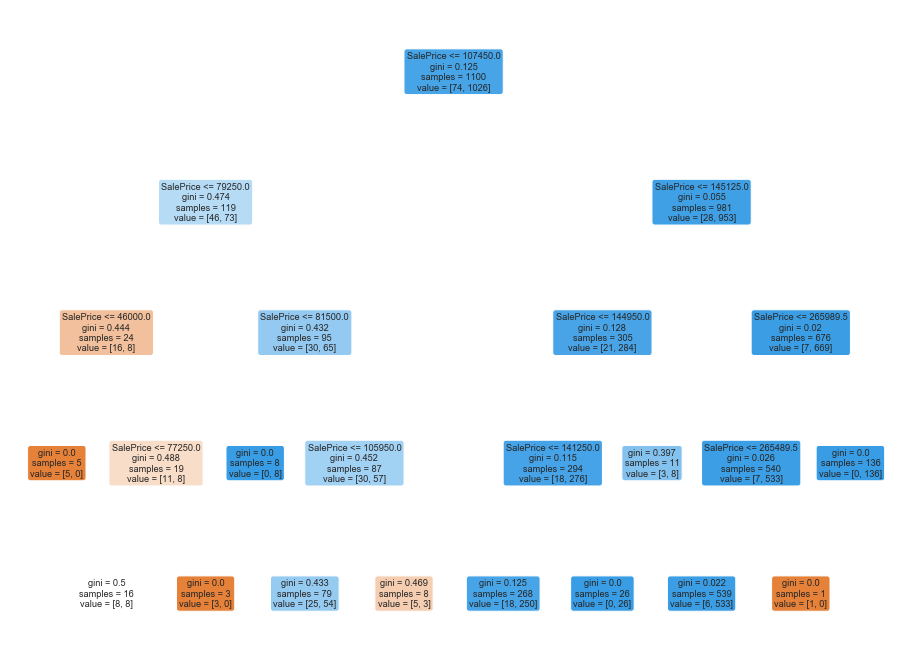

In [9]:
from sklearn.tree import plot_tree

# Plot the Decision Tree model
f, axes = plt.subplots(1, 1, figsize=(16, 12))

plot_tree(dectree, filled=True, rounded = True, 
          feature_names=X_train.columns)
plt.show()

Classification Accuracy 	: 0.9427272727272727
true negative rate  train =  0.021215043394406944
false positive rate train =  0.8253968253968254
false negative rate train =  0.1746031746031746
true positive rate train =  0.9787849566055931


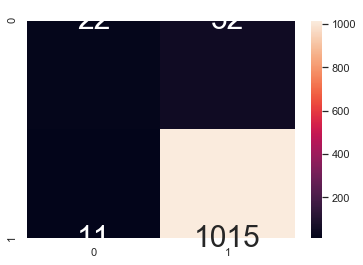

In [10]:
CentralAir_train_pred = dectree.predict(X_train)

print("Classification Accuracy \t:", dectree.score(X_train, y_train))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, CentralAir_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 30})

tn, fp, fn, tp = confusion_matrix(y_train, CentralAir_train_pred).ravel()
tnr = tn/(tn+tp)
tpr = tp/(tn+tp)
fnr = fn/(fn+fp)
fpr = fp/(fn+fp)


print("true negative rate  train = ",tnr)
print("false positive rate train = ",fpr)
print("false negative rate train = ",fnr)
print("true positive rate train = ",tpr)

Classification Accuracy 	: 0.9472222222222222
true negative rate test =  0.02346041055718475
false positive rate test =  0.8947368421052632
false negative rate test =  0.10526315789473684
true positive rate test =  0.9765395894428153


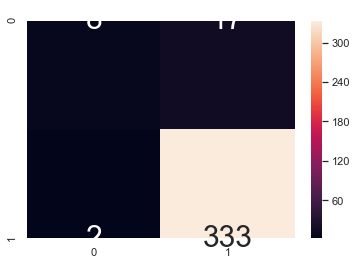

In [11]:
y_test = pd.DataFrame(houseData_test['CentralAir'])
X_test = pd.DataFrame(houseData_test['SalePrice'])

CentralAir_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
accuracy_score = dectree.score(X_test, y_test)
print("Classification Accuracy \t:", accuracy_score)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, CentralAir_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 30})


tnt, fpt, fnt, tpt = confusion_matrix(y_test, CentralAir_test_pred).ravel()
tnrt = tnt/(tnt+tpt)
tprt = tpt/(tnt+tpt)
fnrt = fnt/(fnt+fpt)
fprt = fpt/(fnt+fpt)


print("true negative rate test = ",tnrt)
print("false positive rate test = ",fprt)
print("false negative rate test = ",fnrt)
print("true positive rate test = ",tprt)

In [12]:
matrix = pd.DataFrame(data = {'Variable': ['SalePrice'], "True negative Rate": [tnrt], 'False negative rate': [fnrt], 
         "True positive rate":[tprt],"False Positive rate":[fprt],"Test Accuracy":[accuracy_score]})

Print all the accuracy parameters of the decision tree model, including its Classification Accuracy, True Positive
Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the aforesaid confusion matrix

## Problem 2 : Predicting CentralAir using Other Variables
Perform all the above steps on 'CentralAir' against each of the variables 'GrLivArea', 'LotArea', 'TotalBsmtSF'
one-by-one to obtain individual Decision Trees. Discuss with your Friends about the models, compare the Classification
Accuracy, check the True Positives and False Positives, and determine which model is the best to predict 'CentralAir'.


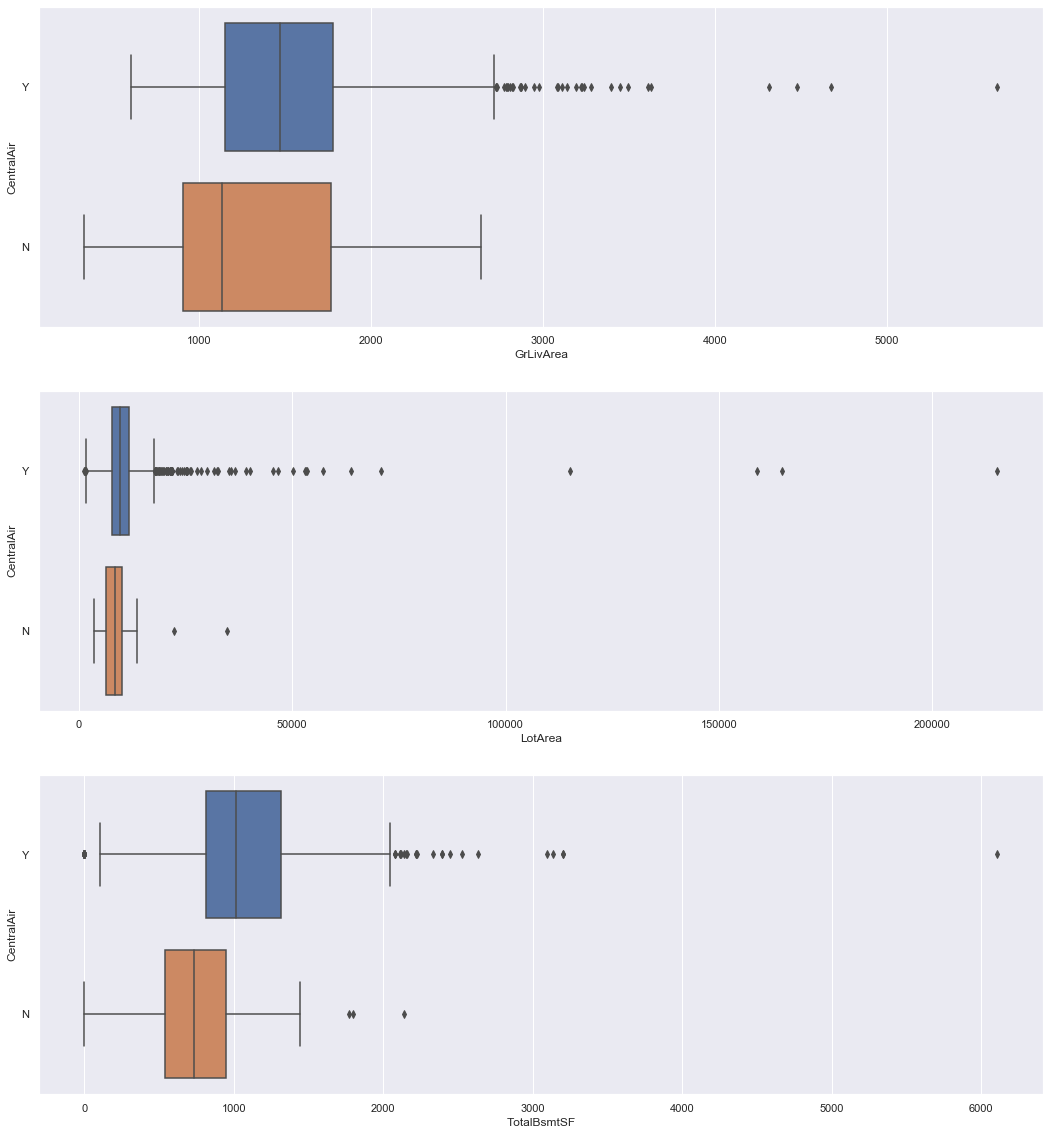

In [13]:
variables = ['GrLivArea', 'LotArea', 'TotalBsmtSF']
colors = ["r", "g", "b"]
count = 0
f, axes = plt.subplots(3, figsize=(18, 20))

for var in variables:
    jointDF = pd.concat([houseData[var], houseData['CentralAir'].reindex(index=houseData[var].index)], sort = False, axis = 1)
    sb.boxplot(x = var , y = houseData['CentralAir'] , data = jointDF, orient = "h", ax = axes[count])
    count += 1

In [14]:
houseData_train = pd.DataFrame(houseData[:1100])
houseData_test = pd.DataFrame(houseData[:360])

In [15]:
from sklearn.metrics import confusion_matrix
def decision_trees(var):
    # Create a Decision Tree Classifier object
    dectree = DecisionTreeClassifier(max_depth = 4)

    y_train = pd.DataFrame(houseData_train["CentralAir"])
    X_train = pd.DataFrame(houseData_train[var])

    # Train the Decision Tree Classifier model
    dectree.fit(X_train, y_train)
    
    # Plot the Decision Tree model
    f, axes = plt.subplots(1, 1, figsize=(16, 12))

    plot_tree(dectree, filled=True, rounded = True, 
              feature_names= X_train.columns)
    plt.show()
    
    CentralAir_train_pred = dectree.predict(X_train)

    print("Classification Accuracy for train result  \t:", dectree.score(X_train, y_train))
    sb.heatmap(confusion_matrix(y_train, CentralAir_train_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 30})
    
    tn, fp, fn, tp = confusion_matrix(y_train, CentralAir_train_pred).ravel()
    tnr = tn/(tn+tp)
    tpr = tp/(tn+tp)
    fnr = fn/(fn+fp)
    fpr = fp/(fn+fp)


    print("true negative rate  train = ",tnr)
    print("false positive rate train = ",fpr)
    print("false negative rate train = ",fnr)
    print("true positive rate train = ",tpr)
    
    y_test = pd.DataFrame(houseData_test['CentralAir'])
    X_test = pd.DataFrame(houseData_test[var])
    
    CentralAir_test_pred = dectree.predict(X_test)
    
    plt.show()

    sb.heatmap(confusion_matrix(y_test, CentralAir_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 30})

    accuracy_result = dectree.score(X_test, y_test)
    tnt, fpt, fnt, tpt = confusion_matrix(y_test, CentralAir_test_pred).ravel()
    tnrt = tnt/(tnt+tpt)
    tprt = tpt/(tnt+tpt)
    fnrt = fnt/(fnt+fpt)
    fprt = fpt/(fnt+fpt)

    # Print the Classification Accuracy
    print("Classification Accuracy for test result \t:", dectree.score(X_test, y_test))
    print("true negative rate  test = ",tnrt)
    print("false positive rate test = ",fprt)
    print("false negative rate test = ",fnrt)
    print("true positive rate test = ",tprt)
    
    return tnrt,tprt,fnrt,fprt,accuracy_result

variables = ['GrLivArea', 'LotArea', 'TotalBsmtSF']

## GrLivArea vs Central Air

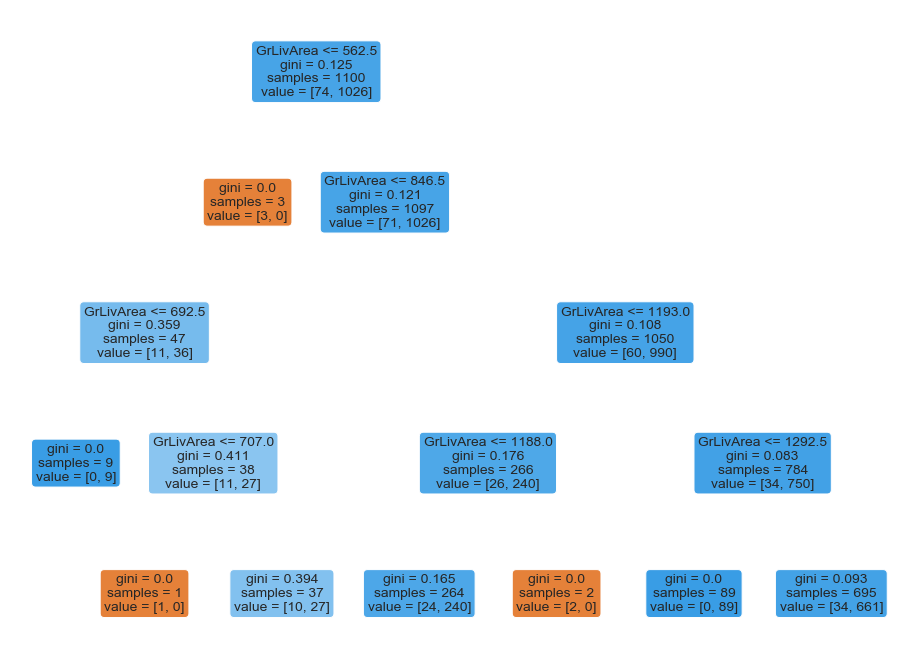

Classification Accuracy for train result  	: 0.9381818181818182
true negative rate  train =  0.005813953488372093
false positive rate train =  1.0
false negative rate train =  0.0
true positive rate train =  0.9941860465116279


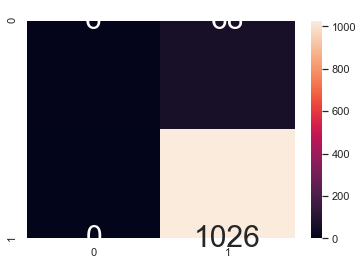

Classification Accuracy for test result 	: 0.9361111111111111
true negative rate  test =  0.005934718100890208
false positive rate test =  1.0
false negative rate test =  0.0
true positive rate test =  0.9940652818991098


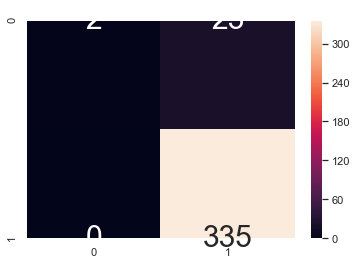

In [16]:
G_tnrt, G_tprt,G_fnrt,G_fprt,G_accuracy_result = decision_trees(variables[0])
G_list = ['GrLivArea',G_tnrt, G_tprt,G_fnrt,G_fprt,G_accuracy_result]

In [17]:
matrix = matrix.append({'Variable':G_list[0] , "True negative Rate": G_list[1], 'False negative rate': G_list[2], "True positive rate":G_list[3],"False Positive rate":G_list[4],"Test Accuracy":G_list[5]}, ignore_index= True)

# LotArea vs Central Air

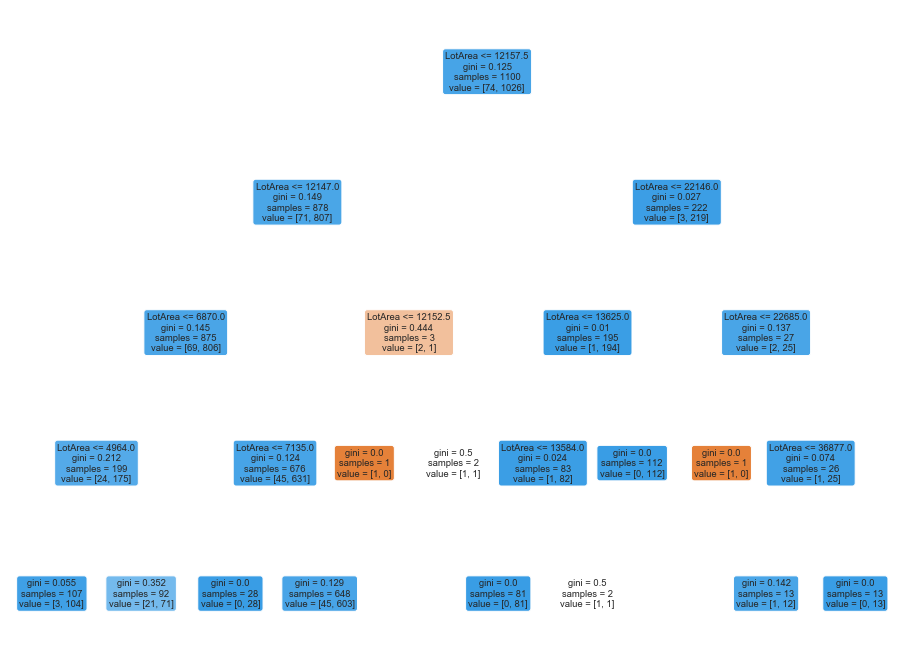

Classification Accuracy for train result  	: 0.9345454545454546
true negative rate  train =  0.0038910505836575876
false positive rate train =  0.9722222222222222
false negative rate train =  0.027777777777777776
true positive rate train =  0.9961089494163424


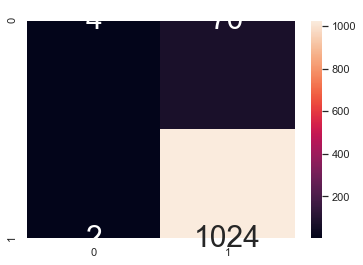

Classification Accuracy for test result 	: 0.9305555555555556
true negative rate  test =  0.0
false positive rate test =  1.0
false negative rate test =  0.0
true positive rate test =  1.0


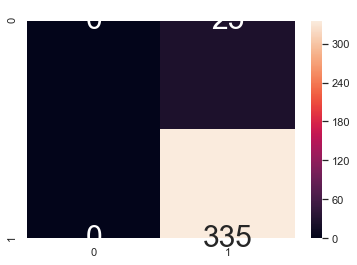

In [18]:
L_tnrt, L_tprt,L_fnrt,L_fprt,L_accuracy_result= decision_trees(variables[1])
L_list = ["LotArea",L_tnrt, L_tprt,L_fnrt,L_fprt,L_accuracy_result]

In [19]:
matrix = matrix.append({'Variable':L_list[0] , "True negative Rate": L_list[1], 'False negative rate': L_list[2], "True positive rate":L_list[3],"False Positive rate":L_list[4],"Test Accuracy":L_list[5]},ignore_index=True)

## TotalBsmtSF vs Central Air

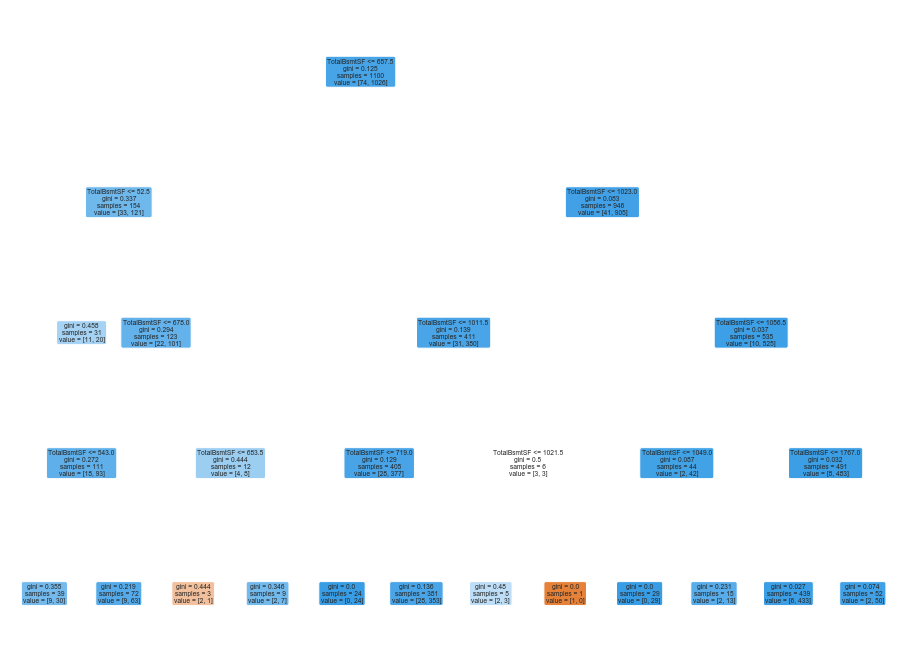

Classification Accuracy for train result  	: 0.9345454545454546
true negative rate  train =  0.0029182879377431907
false positive rate train =  0.9861111111111112
false negative rate train =  0.013888888888888888
true positive rate train =  0.9970817120622568


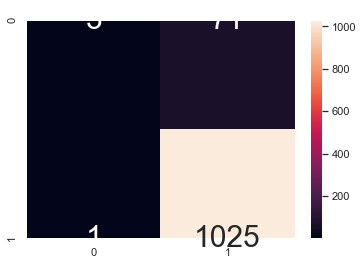

Classification Accuracy for test result 	: 0.9305555555555556
true negative rate  test =  0.0029850746268656717
false positive rate test =  0.96
false negative rate test =  0.04
true positive rate test =  0.9970149253731343


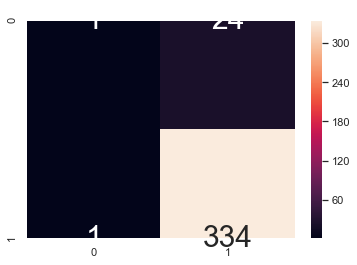

In [20]:
B_tnrt, B_tprt,B_fnrt,B_fprt,B_accuracy_result=decision_trees(variables[2])
B_list =['TotalBsmtSf',B_tnrt, B_tprt,B_fnrt,B_fprt,B_accuracy_result]

In [21]:
matrix = matrix.append({'Variable':B_list[0] , "True negative Rate": B_list[1], 'False negative rate': B_list[2], "True positive rate":B_list[3],"False Positive rate":B_list[4],"Test Accuracy":B_list[5]},ignore_index=True)
matrix

,Variable,True negative Rate,False negative rate,True positive rate,False Positive rate,Test Accuracy
0,SalePrice,0.023460,0.105263,0.97654,0.894737,0.947222
1,GrLivArea,0.005935,0.994065,0.00000,1.000000,0.936111
2,LotArea,0.000000,1.000000,0.00000,1.000000,0.930556
3,TotalBsmtSf,0.002985,0.997015,0.04000,0.960000,0.930556


## Comments

As shown from the table the test result SalePrice is the most has the highest test accuracy for Accurately predicting Central Air as compared to other variavbles.